#Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/kaggle.json') as json_file:
    itemData = json.load(json_file)
    
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d benroshan/factors-affecting-campus-placement --force

from zipfile import ZipFile
file_name = "factors-affecting-campus-placement.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

dataframe = pd.read_csv("/content/drive/My Drive/Placement_Data_Full_Class.csv")
dataframe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


FileNotFoundError: ignored

#Import dataset

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
#change the permission
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d benroshan/factors-affecting-campus-placement

from zipfile import ZipFile
file_name = "factors-affecting-campus-placement.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

Saving kaggle.json to kaggle (1).json
factors-affecting-campus-placement.zip: Skipping, found more recently modified local copy (use --force to force download)
done


In [ ]:
data = pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Exploratory data analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
pd.DataFrame.drop(data,columns="sl_no",inplace=True)
data.nunique()

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [ ]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#Averge percentage you reuire to get placed
df = pd.DataFrame.drop(data,columns=["gender","ssc_b","hsc_b","hsc_s"])
df_new = df.groupby(by  = 'status').mean()
df_new

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


# Data visualisation

Text(0.5, 21.70625000000002, 'prefered subjects')

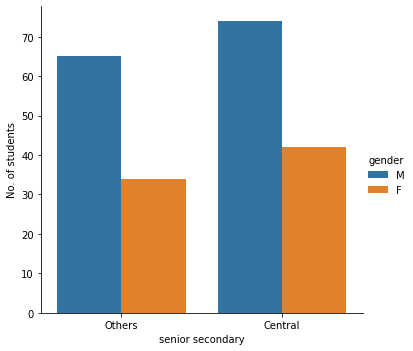

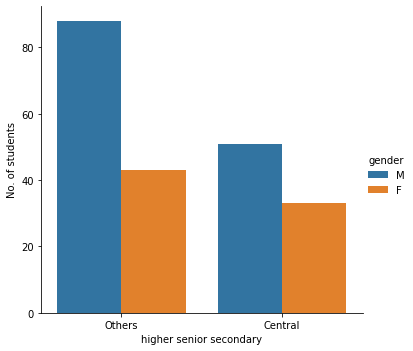

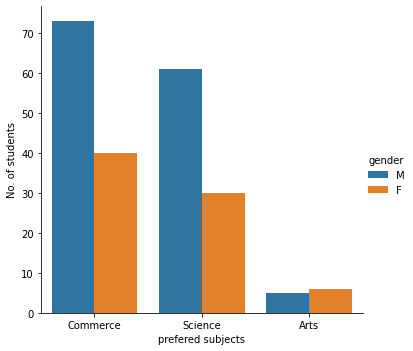

In [ ]:
#number of students from central, other boards in different class
sns.catplot(x="ssc_b",hue="gender",data=data, kind="count",)
plt.ylabel("No. of students")
plt.xlabel("senior secondary")
sns.catplot(x="hsc_b",hue="gender",data=data, kind="count")
plt.ylabel("No. of students")
plt.xlabel("higher senior secondary")
sns.catplot(x="hsc_s",hue="gender",data=data, kind="count")
plt.ylabel("No. of students")
plt.xlabel("prefered subjects")

Text(0.5, 21.70625000000002, 'boards')

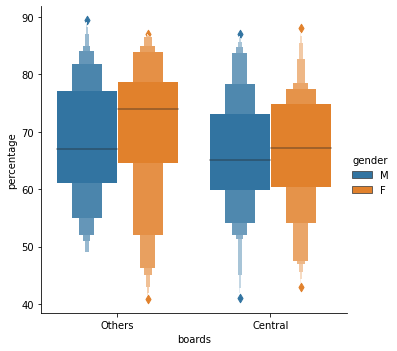

In [ ]:
#average higher secondary percentage gender wise
sns.catplot(x="ssc_b",y="ssc_p",hue="gender",data=data,kind="boxen")
plt.ylabel("percentage")
plt.xlabel("boards")

Text(0.5, 21.706249999999983, 'work exp in different degrees')

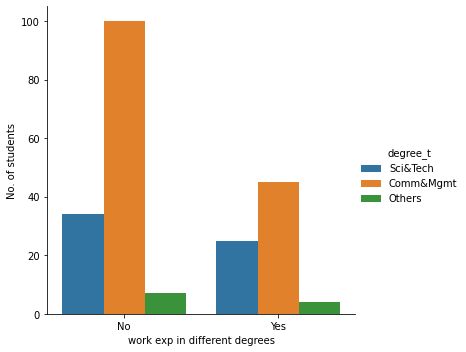

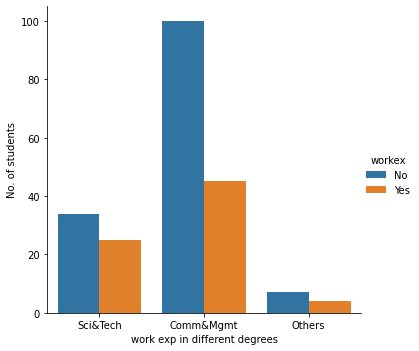

In [ ]:
#Work experience for stdents in different degrees
sns.catplot(x="workex",hue="degree_t",data=data, kind="count")
plt.ylabel("No. of students")
plt.xlabel("work exp in different degrees")
sns.catplot(x="degree_t",hue="workex",data=data, kind="count")
plt.ylabel("No. of students")
plt.xlabel("work exp in different degrees")

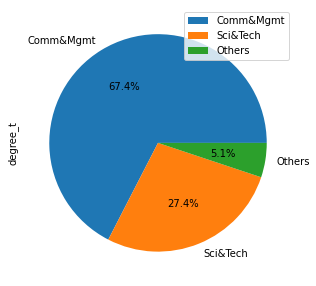

In [ ]:
#which stream is prefered by students the most
df1 = pd.DataFrame(data['degree_t'].value_counts(normalize=True))
plot = df1.plot.pie(y='degree_t', autopct='%1.1f%%', figsize=(5, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b74a10b38>,
      dtype=object)

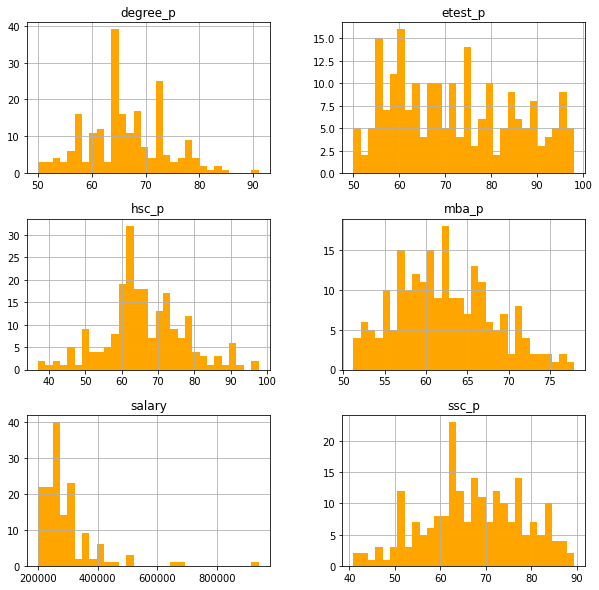

In [ ]:
data.hist(bins = 30, figsize=(10,10), color= 'orange')

# Encoding the categorical data

In [ ]:
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')
df.dtypes
df["workex"] = df["workex"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes
df.tail()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,80.6,82.0,77.6,0,0,91.0,0,74.49,1,400000.0
211,58.0,60.0,72.0,2,0,74.0,0,53.62,1,275000.0
212,67.0,67.0,73.0,0,1,59.0,0,69.72,1,295000.0
213,74.0,66.0,58.0,0,0,70.0,1,60.23,1,204000.0
214,62.0,58.0,53.0,0,0,89.0,1,60.22,0,NaN


In [ ]:
df_class = df.copy()

In [ ]:
df.dropna(inplace=True)
df

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,67.00,91.00,58.00,2,0,55.0,1,58.80,1,270000.0
1,79.33,78.33,77.48,2,1,86.5,0,66.28,1,200000.0
2,65.00,68.00,64.00,0,0,75.0,0,57.80,1,250000.0
4,85.80,73.60,73.30,0,0,96.8,0,55.50,1,425000.0
7,82.00,64.00,66.00,2,1,67.0,0,62.14,1,252000.0
...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.00,0,0,67.0,0,56.49,1,216000.0
210,80.60,82.00,77.60,0,0,91.0,0,74.49,1,400000.0
211,58.00,60.00,72.00,2,0,74.0,0,53.62,1,275000.0
212,67.00,67.00,73.00,0,1,59.0,0,69.72,1,295000.0


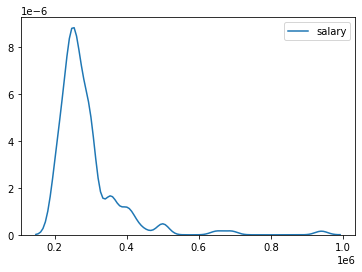

In [ ]:
#PDF of Salary
sns.kdeplot(df["salary"])
plt.show()

In [ ]:
df = df[df["salary"]<350000.0]
df

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,67.00,91.00,58.00,2,0,55.00,1,58.80,1,270000.0
1,79.33,78.33,77.48,2,1,86.50,0,66.28,1,200000.0
2,65.00,68.00,64.00,0,0,75.00,0,57.80,1,250000.0
7,82.00,64.00,66.00,2,1,67.00,0,62.14,1,252000.0
8,73.00,79.00,72.00,0,0,91.34,0,61.29,1,231000.0
...,...,...,...,...,...,...,...,...,...,...
207,83.33,78.00,61.00,0,1,88.56,0,71.55,1,300000.0
209,62.00,72.00,65.00,0,0,67.00,0,56.49,1,216000.0
211,58.00,60.00,72.00,2,0,74.00,0,53.62,1,275000.0
212,67.00,67.00,73.00,0,1,59.00,0,69.72,1,295000.0


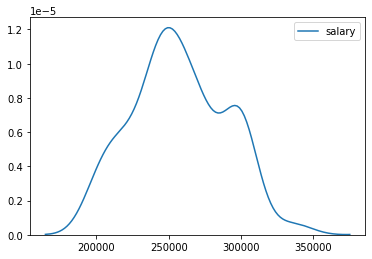

In [ ]:
sns.kdeplot(df["salary"])
plt.show()

In [ ]:
X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

# Build regression model

In [ ]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=0)

In [ ]:
y_test

array([300000., 240000., 236000., 240000., 200000., 240000., 300000.,
       218000., 250000., 340000., 240000., 250000., 300000., 300000.,
       250000., 240000., 270000., 204000., 204000.])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_m.reshape(len(y_pred_m),1), y_test.reshape(len(y_test),1)),1))

[[255969.83 300000.  ]
 [265276.28 240000.  ]
 [252906.7  236000.  ]
 [253514.29 240000.  ]
 [263050.66 200000.  ]
 [256109.95 240000.  ]
 [257033.83 300000.  ]
 [261674.02 218000.  ]
 [252975.84 250000.  ]
 [271359.88 340000.  ]
 [254867.46 240000.  ]
 [264460.81 250000.  ]
 [254777.86 300000.  ]
 [266201.31 300000.  ]
 [259873.11 250000.  ]
 [250674.26 240000.  ]
 [252555.27 270000.  ]
 [273444.14 204000.  ]
 [257379.63 204000.  ]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)
y_pred_r = rfregressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_r.reshape(len(y_pred_r),1), y_test.reshape(len(y_test),1)),1))

[[245400. 300000.]
 [240500. 240000.]
 [273200. 236000.]
 [255900. 240000.]
 [260600. 200000.]
 [250200. 240000.]
 [264100. 300000.]
 [239800. 218000.]
 [261300. 250000.]
 [287600. 340000.]
 [261600. 240000.]
 [261600. 250000.]
 [255700. 300000.]
 [258600. 300000.]
 [273400. 250000.]
 [274900. 240000.]
 [268900. 270000.]
 [273400. 204000.]
 [247500. 204000.]]


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_m))
print(r2_score(y_test, y_pred_r))

-0.03301344656047611
0.0335182204125436


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

MAE = mean_absolute_error(y_test, y_pred_m)
print(MAE)
MAE = mean_absolute_error(y_test, y_pred_r)
print(MAE)

31911.009181038386
31136.842105263157


#Classification of placement

In [ ]:
df_class.nunique()

ssc_p             103
hsc_p              97
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [ ]:
df_class

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,67.00,91.00,58.00,2,0,55.0,1,58.80,1,270000.0
1,79.33,78.33,77.48,2,1,86.5,0,66.28,1,200000.0
2,65.00,68.00,64.00,0,0,75.0,0,57.80,1,250000.0
3,56.00,52.00,52.00,2,0,66.0,1,59.43,0,NaN
4,85.80,73.60,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,0,91.0,0,74.49,1,400000.0
211,58.00,60.00,72.00,2,0,74.0,0,53.62,1,275000.0
212,67.00,67.00,73.00,0,1,59.0,0,69.72,1,295000.0
213,74.00,66.00,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X = df_class.iloc[:,:-2].values
y = df_class.iloc[:,-2].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(random_state=0,max_iter=1000)
lg_classifier.fit(X_train, y_train)
y_pred_lgclass = lg_classifier.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
rf_classifier.fit(X_train, y_train)
y_pred_rfclass = rf_classifier.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_rfclass.reshape(len(y_pred_rfclass),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rfclass)
print(cm)
accuracy_score(y_test, y_pred_rfclass)

[[ 6  6]
 [ 4 17]]


0.696969696969697

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgclass)
print(cm)
accuracy_score(y_test, y_pred_lgclass)

[[ 7  5]
 [ 3 18]]


0.7575757575757576